In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
len(x_train)


60000

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
from keras.utils import np_utils


In [9]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


In [10]:
y_train[87]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD

In [12]:
model = Sequential()


In [13]:
model.add(Flatten(input_shape=(28, 28)))


In [14]:
model.add(Dense(6, activation='relu'))


In [15]:
model.add(Dense(66, activation='relu'))


In [16]:
model.add(Dense(666, activation='relu'))

In [17]:
model.add(Dense(10, activation='softmax'))


In [18]:
model.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])


In [19]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 4710      
_________________________________________________________________
dense_2 (Dense)              (None, 66)                462       
_________________________________________________________________
dense_3 (Dense)              (None, 666)               44622     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                6670      
Total params: 56,464
Trainable params: 56,464
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(x_train, y_train, batch_size=100, epochs=20)




Epoch 1/20
60000/60000 [==============================] - 57s 956us/step - loss: 0.0898 - acc: 0.1365
Epoch 2/20
60000/60000 [==============================] - 47s 778us/step - loss: 0.0890 - acc: 0.1566
Epoch 3/20
60000/60000 [==============================] - 51s 854us/step - loss: 0.0861 - acc: 0.2215
Epoch 4/20
60000/60000 [==============================] - 59s 980us/step - loss: 0.0788 - acc: 0.2932
Epoch 5/20
60000/60000 [==============================] - 57s 949us/step - loss: 0.0660 - acc: 0.4993
Epoch 6/20
60000/60000 [==============================] - 57s 944us/step - loss: 0.0480 - acc: 0.6735
Epoch 7/20
60000/60000 [==============================] - 59s 978us/step - loss: 0.0348 - acc: 0.7681
Epoch 8/20
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0287 - acc: 0.8106
Epoch 9/20
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0252 - acc: 0.8336
Epoch 10/20
60000/60000 [==============================] - 62s 1ms/step - loss: 0.02

In [21]:
from ipywidgets import interact_manual

In [22]:
predict = model.predict_classes(x_test)


In [23]:
predict

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [24]:
def test(測試編號):
    plt.imshow(x_test[測試編號], cmap='Greys')
    print('神經網路判斷為:', predict[測試編號])

神經網路判斷為: 6


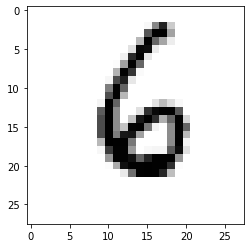

In [29]:
test(91)

In [30]:
interact_manual(test, 測試編號=(0, 9999))

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

<function __main__.test(測試編號)>

In [31]:
model_json = model.to_json()
open('1002hw.json', 'w').write(model_json)
model.save_weights('1002hw_weights.h5')